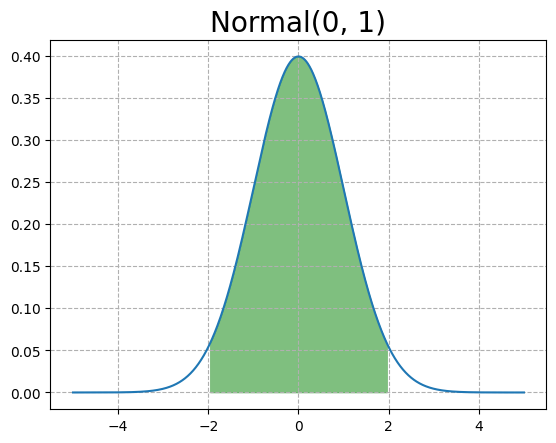

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
 
# print(norm.__doc__) # see basic information
mu, sigma = 0, 1
xlim = [mu - 5 * sigma, mu + 5 * sigma]
x = np.linspace(xlim[0], xlim[1], 1000)
y = norm.pdf(x, loc = mu, scale = sigma)
 
plt.plot(x, y)
#指定風格
plt.style.use('fivethirtyeight') # 538 style
#如果不想要538 style的話
#按restart清掉jupyter variables，就不會是538 style了
#plt.style.use("ggplot")
 
# patch the area of confidence interval
#回去想一下如何改這個讓不管sigma怎麼改結果都會對
conf = 0.95
ci = norm.ppf([(1-conf)/2, (1+conf)/2]) # inverse CDF　function
#只有放機率的話會直接被當成標準常態 
#??norm.ppf
x_ci = np.linspace(ci[0], ci[1], 1000)
y_ci = norm.pdf(x_ci, mu, sigma)
 
plt.fill_between(x_ci, y_ci, 0, color = 'g', alpha = 0.5)
plt.grid(True, linestyle='--', which='major')
plt.title('Normal({}, {})'.format(mu, sigma))
plt.show()

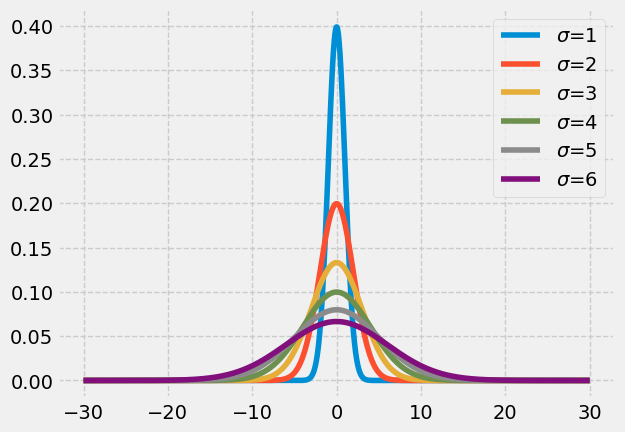

In [20]:

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
 
# print(norm.__doc__) # see basic information
mu = 0
#sigma = np.array([1, 2, 3, 4, 5])
sigma = np.arange(1,7)
#xlim = [mu - 5 * sigma, mu + 5 * sigma] #xlim的樣子很奇怪
xlim = [mu - 5 * sigma.max(), mu + 5 * sigma.max()]
x = np.linspace(xlim[0], xlim[1], 1000)
#y = norm.pdf(x, loc=mu, scale=sigma)#error #sigma有5個不能幫忙broadcast
#因為x是1*5矩陣，sigma也是1*5矩陣

#correct answer1
#Y是一個矩陣
Y = norm.pdf(x.reshape(-1,1), loc=mu, scale=sigma)
#plt.plot(x, Y, label=["1","2","3","4","5"])#x是向量Y是矩陣，會自動一個一個對去畫圖
plt.plot(x, Y, label = ["$\sigma$={}".format(i) for i in sigma])

#correct answer2
#for i in sigma:
#    y = norm.pdf(x, loc=mu, scale=i)
#    plt.plot(x, y, label= "$\sigma$={}".format(i))

#指定風格
plt.style.use('fivethirtyeight') # 538 style
plt.grid(True, linestyle='--', which='major')
plt.legend() #為了顯示plt.plot的label
plt.show()

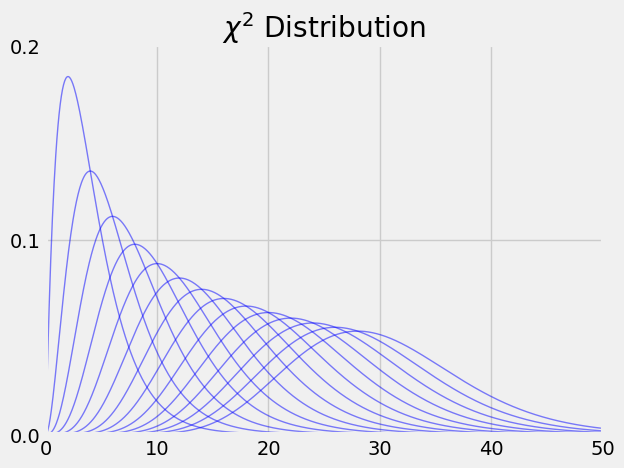

In [26]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
 
xlim = [0, 50]
x = np.linspace(xlim[0], xlim[1], 1000)
 
# df 
df = np.arange(4, 32, 2)
# fix xlim before animation
plt.figure()
plt.axis([xlim[0], xlim[1], 0, 0.2])
for i in df:
    y=chi2.pdf(x, i)
    plt.plot(x,y, lw=1, color='blue', alpha=0.5)#alpha:透明度
    #plt.pause(0.5) #另外建py檔，會變成動圖
 
plt.title(r'$\chi^2$ Distribution')
plt.yticks([0, 0.1, 0.2])
plt.show()

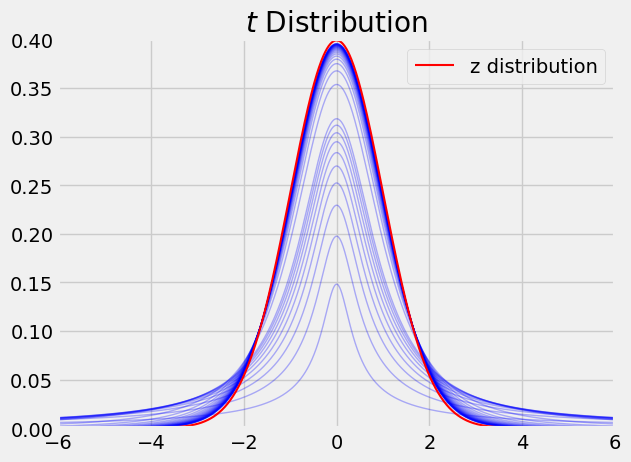

In [57]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
 
xlim = [-6, 6]
x = np.linspace(xlim[0], xlim[1], 1000)
 
# df 
df = np.r_[np.arange(0.1, 1, 0.1), np.arange(1, 30)]
# fix xlim before animation
plt.figure()
plt.axis([xlim[0], xlim[1], 0, 0.2])
for i in df:
    y=t.pdf(x, i)
    plt.plot(x,y, lw=1, color='blue', alpha=0.3)#alpha:透明度
    #plt.pause(0.5) #另外建py檔，會變成動圖

z=norm.pdf(x, 0, 1)
plt.plot(x,z, lw=1.5, color="red", label="z distribution")
plt.title(r'$t$ Distribution')
plt.ylim(0, 0.4)
#plt.yticks([0, 0.4, 0.05])
plt.legend()
plt.show()

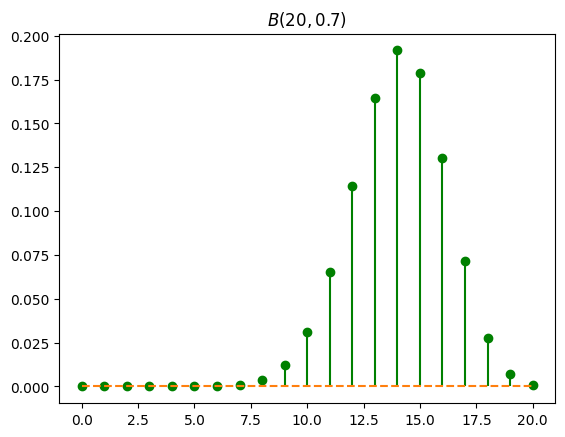

In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
 
n, p = 20, 0.7
x = np.arange(n + 1)
y = binom.pmf(x, n, p)
plt.stem(x, y, linefmt='g-', markerfmt='o', basefmt = 'C1--')
# plt.plot(x, y, drawstyle = 'steps-pre')
plt.title('$B(20, 0.7)$')
plt.show()

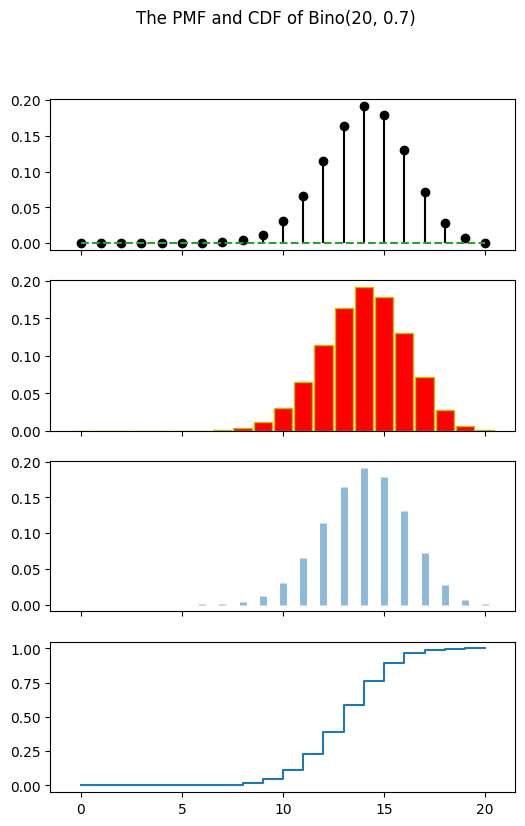

In [3]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
 
n, p = 20, 0.7
x = np.arange(n + 1)
y = binom.pmf(x, n, p)
fig, ax = plt.subplots(4,1, sharex = 'col', figsize = [6, 9]) #sharex: 共用x軸
ax[0].stem(x, y, linefmt='k-', markerfmt='ko', basefmt = 'C2--')
ax[1].bar(x, y, width = 0.9, color = 'r', edgecolor = 'y' )
ax[2].vlines(x, 0, y, lw = 5, alpha = 0.5)
Y = binom.cdf(x, n, p)
ax[3].plot(x, Y, drawstyle = 'steps-pre')
plt.suptitle('The PMF and CDF of Bino({}, {})'.format(n, p))
plt.show()